# TP 3

Le but du TP est de d'intéresser dans un premier temps aux distributions de variables jointes, et ensuite de voir des exemples du théorème de Bayes et des probabilités conditionnelles

<b>
    <span style="color:orange">
        Question
    </span> 
</b>

<b>
    <span style="color:red">
        Correction
    </span> 
</b>

<b>
    <span style="color:purple">
        Remarques
    </span> 
</b>

<b>
    <span style="color:green">
        Sujet
    </span> 
</b>

## Distribution jointe 

On va regarder un exemple simpe de distribution jointe. On considère le jeu de données `count_1w.txt` qui a répertorié les ~ 300 000 mots les plus fréquents (en anglais) d'un ensemble de livres. La structure du fichier est la suivante : sur chaque ligne on a un mot suivit du nombre d'occurence. Les mots sont ordonnées par occurence décroissante.

  1. Afficher la distribution empirique des mots. Quelle est le comportement de la distribution empirique pour les mots les moins fréquents ?
  2. On va considérer chaque mot séparément. On veut regarder la probabilité d'une lettre d'être au moins présente une fois dans un mot. Calculer cette distribution empirique.
  3. Calculer maintenant la distribution jointe d'avoir deux lettres qui se suivent dans un mot (indépendement de la fréquence du mot). Afficher la distritbution à l'aide de la fonction imshow.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

try: 
    import seaborn as sns
    sns.set()
    sns.set_style("whitegrid")
    sns.set_context("poster")
except ImportError:
    print('seaborn allow pretty plots')

mpl.rcParams['figure.figsize'] = [8.0, 6.0]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100

mpl.rcParams['font.size'] = 10
mpl.rcParams['axes.labelsize'] = 10
mpl.rcParams['axes.titlesize'] = 17
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'



In [2]:
mpl.rc('axes', labelsize=15)

### Load data

In [3]:
data = pd.read_csv("count_1w.txt", sep='\t', header=None)
data.head()

0            1
0  the  23135851162
1   of  13151942776
2  and  12997637966
3   to  12136980858
4    a   9081174698

<b>
    <span style="color:orange">
        Question
    </span> 
</b>

### Q1 : Afficher la distribution empirique des mots.


<b>
    <span style="color:red">
        Correction
    </span> 
</b>

In [4]:
# Version 0
w_count = {}
tot = 0.0
for line in open("count_1w.txt"):
    words = line.split()
    w_count[words[0]] = int(words[1])
    tot += int(words[1])
    
for k in w_count.keys():
    w_count[k] = w_count[k]/tot

In [5]:
# Version 1
w_count = dict( line.split() for line in open("count_1w.txt") )
w_count = {w: int(c) for w, c in w_count.items()}
tot = sum(w_count.values())
w_count = {w: c/tot for w, c in w_count.items()}


In [6]:
pr = np.zeros(len(w_count.keys()))
for idx, k in enumerate(w_count.keys()):
    pr[idx] = w_count[k]

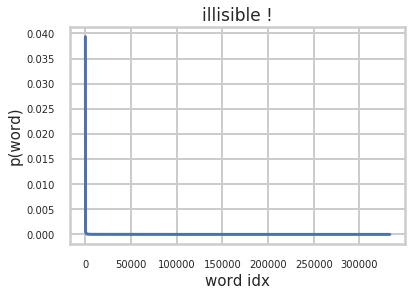

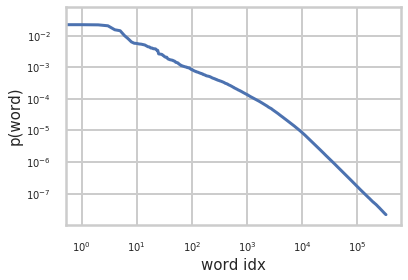

In [7]:
plt.plot(pr)
plt.xlabel('word idx')
plt.ylabel('p(word)')
plt.title('illisible !')
plt.show()

plt.loglog(pr)
plt.xlabel('word idx')
plt.ylabel('p(word)')
plt.show()

### Quelle est le comportement de la distribution empirique pour les mots les moins fréquents ?



<b>
    <span style="color:red">
        Correction
    </span> 
</b>

On est quasiment linéaire en loglog. 

Donc une loi puissance devrait bien fit les données.


$$ f(x) = offset \times x^{slope} $$
$$ log(f(x)) = log(offset) + log(x)\times slope $$

<b>
    <span style="color:purple">
        Remarques
    </span> 
</b>


On fait plein de chose avec une regression linéaire. 
Pas seulement des modèles linéaire !


Regression *linéaire* signifie que les **paramètres** ($a, b, c, d, ...$) sont linéaires.
Mais le modèle peut être polynomial ou tout autre fonction fantaisiste des données

example :
$$ F(x) = a + b\times log(x)  + c \times x^2 + d \times g(x) + ... $$


<b>
    <span style="color:red">
        Correction
    </span> 
</b>

Slope= -1.7075491291068114


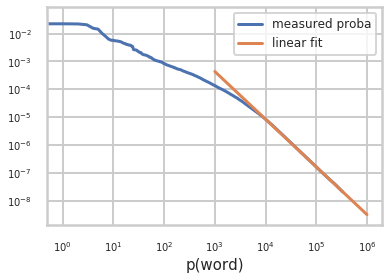

In [8]:
# Naive fit
# 1) computing the slope
x1 = 10**4
x2 = 10**5
slope = np.log( pr[x2] / pr[x1] ) / np.log(x2/x1)
offset = pr[x1] / x1**slope
print("Slope=", slope)

# 3) showing it
plt.loglog(pr, label='measured proba')
plt.xlabel('word idx')
plt.xlabel('p(word)')

xr = np.arange(1000, 1000000)
plt.loglog(xr, offset * xr**slope, label='linear fit')
plt.legend(loc='upper right')
plt.show()

<b>
    <span style="color:orange">
        Question
    </span> 
</b>

### Regardons maintenant les lettres
On va considérer chaque mot séparément.

On veut regarder la probabilité d'une lettre d'être au moins présente une fois dans un mot.
Calculer cette distribution empirique.


exelent -> e, x, l, n, t

<b>
    <span style="color:red">
        Correction
    </span> 
</b>

In [9]:
letters_count = {}

for w in w_count.keys():
    for l in set(w):
        letters_count[l] = letters_count.get(l, 0) + 1
    
tot = sum(letters_count.values())
letters_count = {letter: count /tot for letter, count in letters_count.items()}


In [10]:
print("Frequence e=", letters_count['e'])

Frequence e= 0.09050133775465072


In [11]:
# getting alphabet for the graph
alph = sorted(letters_count)
# convert to numpy array
n_letters = len(letters_count)
proba_letter = np.array([letters_count[letter] for letter in alph])


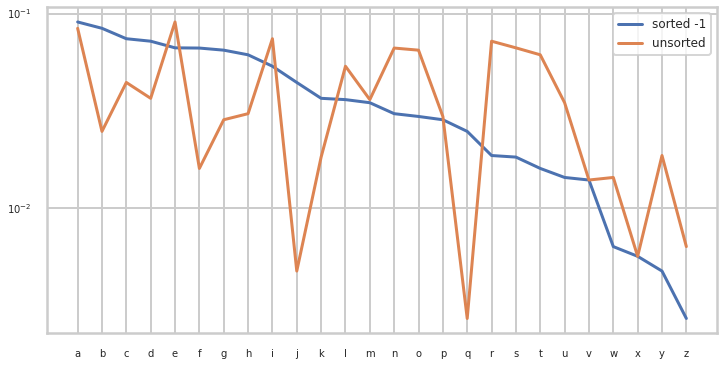

In [12]:
fig, ax = plt.subplots(figsize=(12,6))
ax.semilogy(np.sort(proba_letter)[::-1], label='sorted -1')
ax.semilogy(proba_letter, label='unsorted')

# ... and label them with the respective list entries
ax.set_xticks(np.arange(len(alph)));
ax.set_xticklabels(alph);
# WARNING : the xaxis is wrong for the blue curve
plt.legend()
plt.show()

<b>
    <span style="color:orange">
        Question
    </span> 
</b>

### Fréquence de paire

Calculer maintenant la distribution jointe d'avoir deux lettres qui se suivent dans un mot (indépendement de la fréquence du mot). Afficher la distritbution à l'aide de la fonction imshow.

In [13]:
def generate_bigrams(sentence):
    for i in range(1, len(sentence)):
        yield sentence[i - 1], sentence[i]


exelent -> ex, xe, el, le, en, nt

<b>
    <span style="color:purple">
        Remarques
    </span> 
</b>

Dans la précédente correction :

```python
bigram = (n, e)
bigram[::-1] = (e, n)
```

Mais c'est étrange car on cherche la proba $p(e | previous\_letter=n)$

Donc on a **pas nécessairement** $p(e|n) = p(n|e)$ !!

Sinon c'est moins intéressant, non ? (la symétrie c'est jolie, mais la brisure de symétrie c'est exquis !)

<b>
    <span style="color:red">
        Correction
    </span> 
</b>

In [14]:
# on compte les pairs ordonnées de lettres dans les mots
bigram_letter_count = {}
for word in w_count.keys():
    for bigram in generate_bigrams(word):
        bigram_letter_count[bigram] = bigram_letter_count.get(bigram, 0) + 1            


In [15]:
indexes = {letter: i for i, letter in enumerate(alph)}

In [16]:
proba_mat = np.zeros( shape=(len(alph), len(alph)) )
for (letter_0, letter_1), count in bigram_letter_count.items():
    i = indexes[letter_0]
    j = indexes[letter_1]
    proba_mat[i, j] = count
proba_mat /= proba_mat.sum()    

Les étudiants n'ont peut-être pas `seaborn` d'installée ... C'est triste :'( 

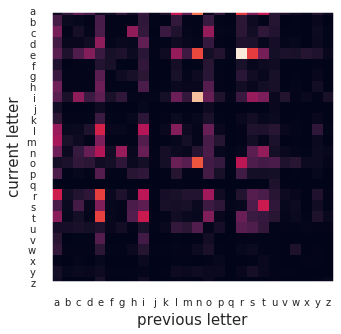

In [17]:
with sns.axes_style("dark"):
    fig, ax = plt.subplots(figsize=(12,5))
    im = ax.imshow(proba_mat)

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(alph)))
    ax.set_yticks(np.arange(len(alph)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(alph)
    ax.set_yticklabels(alph)
    ax.set_ylabel('current letter')
    ax.set_xlabel('previous letter')
    

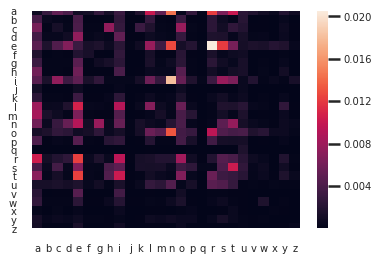

In [18]:
sns.heatmap(proba_mat, xticklabels=alph, yticklabels=alph)
plt.show()

<b>
    <span style="color:green">
        Sujet
    </span> 
</b>

#### Modèle n-grams

Les modèles n-grams de langage consiste à l'utilisation de probabilités conditionnelles afin de constuire des modèles (élémentaires) de langage. On va donc chercher à utiliser des corpus de phrases afin de construire les probabilités conditionnelles suivantes $p(w_i|w_{i-1}, ..., w_{i-(n-1)})$ où on veut donc avoir la probabilité du mot $w_i$ en fonction des $n-1$ mots qui le précèdent dans un ordre précis.

On va regarder un exemple simple de modèle 3-grams. Le travail est le suivant:
  1. Ecrire la fonction generate_trigrams qui, à partir d'une séquence de mots d'une phrase renvoie tous les triplets (ex : "je suis un chien" doit renvoyer [['je','suis','un'],['suis,'un','chien']]
  2. Lire le fichier "wine.txt" par ligne. Chaque ligne correspond à une critique entière, commençant par "BEGIN NOW" et finissant par "END", permettant ainsi d'initialiser correctement une probabilité pour le début et la fin de la phrase ( p(mot| BEGIN, NOW) et p(END| ...) ). Utiliser la fonction definie ci-dessous pour en extraire les triplets et construire un dictionnaire qui à un tuple de deux éléments, associe un troisième et compte le nombre d'occurence.
  3. Normaliser la distribution pour chaque triplet.
  4. Générer des phrases à l'aide des distributions construites. Vous penserez bien à commencer le début de la phrase en utilisant le tuple ("BEGIN","NOW") et à utiliser la fonction np.random.choice permettant de choisir un objet parmi une liste avec des probabilités associées (cf ci-dessous).
  

<b>
    <span style="color:orange">
        Question
    </span> 
</b>

  1. Ecrire la fonction generate_trigrams qui, à partir d'une séquence de mots d'une phrase renvoie tous les triplets (ex : "je suis un chien" doit renvoyer [['je','suis','un'],['suis,'un','chien']]


<b>
    <span style="color:red">
        Correction
    </span> 
</b>

In [19]:
def generate_trigrams(sentence):
    for i in range(2, len(sentence)):
        yield sentence[i - 2], sentence[i - 1], sentence[i]


<b>
    <span style="color:green">
        Sujet
    </span> 
</b>

p(next_word | previous_word, previous_previous_word)

In [20]:
myphrase = "les choux sont blancs, mais les choux sont rouges."
sentence = myphrase.strip().split()
a = generate_trigrams(sentence)
for trig in a:
    print(trig)

('les', 'choux', 'sont')
('choux', 'sont', 'blancs,')
('sont', 'blancs,', 'mais')
('blancs,', 'mais', 'les')
('mais', 'les', 'choux')
('les', 'choux', 'sont')
('choux', 'sont', 'rouges.')


Histoire de ne pas recoder la roue comme dans l'exo 1.
Voici un dictionnaire qui sert justement à compter.

In [21]:
from collections import Counter, defaultdict
from itertools import chain
import random


In [22]:
c = Counter(['a', 'b', 'a', 'c', 'd', 'e' ])
print(c)
c.update('a')
print(c)
c.update('h')
print(c)
c.update(['b', 'b', 'c'])
print(c)
c['e'] = 5
print(c)


Counter({'a': 2, 'b': 1, 'c': 1, 'd': 1, 'e': 1})
Counter({'a': 3, 'b': 1, 'c': 1, 'd': 1, 'e': 1})
Counter({'a': 3, 'b': 1, 'c': 1, 'd': 1, 'e': 1, 'h': 1})
Counter({'a': 3, 'b': 3, 'c': 2, 'd': 1, 'e': 1, 'h': 1})
Counter({'e': 5, 'a': 3, 'b': 3, 'c': 2, 'd': 1, 'h': 1})


<b>
    <span style="color:orange">
        Question
    </span> 
</b>

  2. Lire le fichier "wine.txt" par ligne. Chaque ligne correspond à une critique entière, commençant par "BEGIN NOW" et finissant par "END", permettant ainsi d'initialiser correctement une probabilité pour le début et la fin de la phrase ( p(mot| BEGIN, NOW) et p(END| ...) ). Utiliser la fonction definie ci-dessous pour en extraire les triplets et construire un dictionnaire qui à un tuple de deux éléments, associe un troisième et compte le nombre d'occurence.


**Indications**

choux, blanc, fleur

{(w0, w1) : [p(w_i)] }

{(choux, blanc) : [p(rouge), p(END), ...] } }

{(choux, blanc) : {rouge: 15, END: 34, fleur: 0,  ... } }


{ (choux, blanc) : Counter} }


p(fleur| choux, blanc) = x

$\sum_{mot_i} p(mot_i| choux, blanc) = 1$



<b>
    <span style="color:red">
        Correction
    </span> 
</b>

In [23]:

model = defaultdict(Counter)
for sentence in open("wine.txt"):
    sentence_ = sentence.split()   
    if sentence_ == ["BEGIN", "NOW", "END"]:
        continue
    for ngram in generate_trigrams(sentence_):
        history = ngram[:-1]
        word = ngram[-1]
        model[history].update([word])
        
model = {history: {w: c / sum(words.values()) for w, c in words.items()} for history, words in model.items()}


<b>
    <span style="color:green">
        Sujet
    </span> 
</b>

Maintenant on peut jouer à générer des critiques de vins !

In [24]:
def sample_from_discrete_distrib(distrib):
    words, probas = list(zip(*distrib.items()))
    return np.random.choice(words, p=probas)
    

for i in range(5):
    history = ("BEGIN", "NOW")
    sent = []
    while True:
        word = sample_from_discrete_distrib(model[history])
        history = history[1], word

        if word == "END":
            break

        sent.append(word)
        
    print(" ".join(sent))
    print("\n")

Offers a fresh, zesty finish. Nicely done. Drink now. 280 cases imported.


An elegant, rich and concentrated, with a tight, firm core of crushed blackberries on the finish. Drink now. 25,000 cases made.


Loads of vanilla, sage and cocoa notes on the finish. Finely wrought and distinctive. A jazzy mouthful of black fruit, toasted oak in the modern style. The velvety texture carries generous flavors of Meyer lemon, brioche and elderflower flavors. It's well structured and well-balanced on a sleek frame and through a core of wild berry, floral and straw flavors that firm on the finish. Fleshy and forward, with lots of fresh herb. Medium-bodied, with well-structured flavors of remarkable harmony and a medium body, good acidity that keeps the flavors grow on you, showing a pleasant texture on the supple finish. Drink now through 2025. 2,000 cases imported.


A beautiful evocation of plum skin, cassis and plum carry over to the steely finish. For fans of full-throttle Cabernet won't be dis

### Théorèmes de Bayes

<b>
    <span style="color:orange">
        Question
    </span> 
</b>

<b>
    <span style="color:red">
        Correction
    </span> 
</b>

<b>
    <span style="color:purple">
        Remarques
    </span> 
</b>

<b>
    <span style="color:green">
        Sujet
    </span> 
</b>

#### Inférence Bayésienne

On a 11 boites, 10 boules par boites qui sont ou blanches ou noires.
* La boite numéro 0 contient 10 boules blanches
* La boite numéro 1 contient 1 boule noire et 9 boules blanches
* La boite numéro 2 contient 2 boules noires et 8 boules blanches
* etc
* La boite numéro $u$ contient $u$ boules noires et $N_{box}-u$ boules blanches.

On dispose d'une boite.
On cherche à savoir de laquelle il s'agit en échantillonnant/tirant des boules (avec replacement).

On tire donc $N_{draw}$ boules et on observe $n_{black}$ boules noires.

On souhaite tracer la courbe

$$
 p(u|n_{black},N_{draw}) = \frac{p(n_{black}|u, N_{draw}) p(u)}{p(n_{black}|N_{draw})}
$$

vu en cours.

On considérera donc les 11 boîtes ($N_{box}=11$), chacune contenant 10 ($n_{box} - 1$) boules.
Pour cela on codera les fonctions:

1. implémentation de la fonction $p(n_{black}|u, N_{draw})$
2. implémentation de la fonction $p(n_{black}|N_{draw})$
3. implémentation de la fonction $p(u | n_{black}, N_{draw})$

Rappel : $p(n_{black}|u,N_{draw}) = \frac{N_{draw}!}{n_{black}! (N_{draw}-n_{black})!} (u/10)^{n_{black}} (1-u/10)^{N_{draw}-n_{black}}$

In [25]:
import scipy.special

In [26]:
N_box = 11  ## Nb box
N_ball = 10  ## Nb boules (noires ou blanches) totale d'une boite 

$ C_{n_{black}}^{N_{draw}} = \frac{N_{draw}!}{n_{black}! (N_{draw}-n_{black})!} $

$$C_{n}^{k}$$

$N_{draw}$ parmi $n_{black}$


<b>
    <span style="color:orange">
        Question
    </span> 
</b>

In [27]:
def likelihood(n_black, u, N_draw):
    """proba (n_black | u, N_draw) 
    proba n_black given u and  N_draw
    """
    # TODO
    return 0 


<b>
    <span style="color:red">
        Correction
    </span> 
</b>

In [28]:
def likelihood(n_black, u, N_draw):
    """proba (n_black | u, N_draw) 
    proba n_black given u and  N_draw
    """
    C = scipy.special.binom(N_draw, n_black)
    pr = (u / N_ball)**n_black * (1 - u / N_ball)**(N_draw - n_black)
    return C * pr

In [29]:
# test
cum = 0
box_number_2 = 2
N_draw = 20
for i in range(N_draw+1): #20 tirage boite numéro 2
    cum += likelihood(i, box_number_2, N_draw)
    print("Proba n_black=", i, " = ", likelihood(i, box_number_2, N_draw))
    
print(cum)    

Proba n_black= 0  =  0.011529215046068483
Proba n_black= 1  =  0.05764607523034242
Proba n_black= 2  =  0.13690942867206327
Proba n_black= 3  =  0.20536414300809488
Proba n_black= 4  =  0.21819940194610074
Proba n_black= 5  =  0.17455952155688062
Proba n_black= 6  =  0.10909970097305038
Proba n_black= 7  =  0.054549850486525185
Proba n_black= 8  =  0.022160876760150862
Proba n_black= 9  =  0.007386958920050286
Proba n_black= 10  =  0.0020314137030138287
Proba n_black= 11  =  0.00046168493250314287
Proba n_black= 12  =  8.65659248443393e-05
Proba n_black= 13  =  1.3317834591436813e-05
Proba n_black= 14  =  1.6647293239296018e-06
Proba n_black= 15  =  1.6647293239296019e-07
Proba n_black= 16  =  1.3005697843200012e-08
Proba n_black= 17  =  7.65041049600001e-10
Proba n_black= 18  =  3.1876710400000044e-11
Proba n_black= 19  =  8.38860800000001e-13
Proba n_black= 20  =  1.0485760000000012e-14
1.000000000000001


Petit example

In [30]:
# version 0
NTir = 100
U = 3  # box number 3 = 3 black + 7 white balls
vect_likelihood = np.vectorize(lambda x: likelihood(x, U, NTir))
pr = vect_likelihood(np.arange(NTir+1))


In [31]:
# version 1
NTir = 100
U = 3  # box number 3 = 3 black + 7 white balls
pr = np.array([likelihood(i, U, NTir) for i in range(NTir+1)])


In [32]:
# version 2
NTir = 100
U = 3  # box number 3 = 3 black + 7 white balls
pr = np.zeros(NTir+1)
for i in range(NTir+1):
    pr[i] = likelihood(i, U, NTir)
    

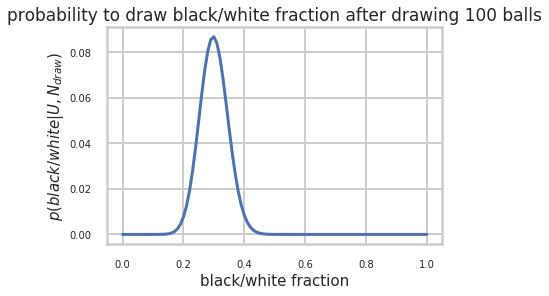

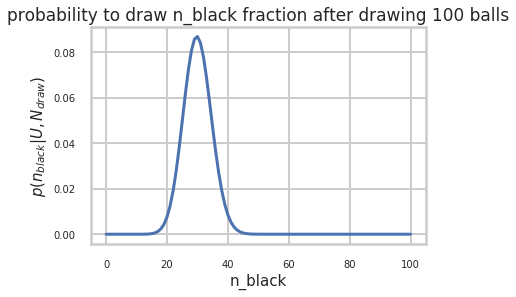

In [33]:
xr = np.arange(0, 1.00001, 1 / NTir)
plt.plot(xr, pr)
plt.ylabel('$p(black/white | U, N_{draw})$')
plt.xlabel('black/white fraction')
plt.title('probability to draw black/white fraction after drawing 100 balls')
plt.show()

xr = np.arange(0, NTir+1, 1)
plt.plot(xr, pr)
plt.xlabel('n_black')
plt.ylabel('$p(n_{black} | U, N_{draw})$')
plt.title('probability to draw n_black fraction after drawing 100 balls')
plt.show()


<b>
    <span style="color:orange">
        Question
    </span> 
</b>

In [34]:
def evidence(n_black, N_draw):
    """proba (n_black | N_draw) 
    proba n_black given N_draw
    """
    # TODO !
    return 0.0
# p(u) uniforme
# donc p(u) = 1/Nu

<b>
    <span style="color:red">
        Correction
    </span> 
</b>

$$ p(x | a ) = \sum_{b_i} p(x | a, b_i) p(b_i)  $$
$$ p(x | a ) = \int_{b} p(x | a, b) p(b) db  $$


In [35]:
# Version 0
def evidence(n_black, N_draw):
    """proba (n_black | N_draw) 
    proba n_black given N_draw
    """
    sum = 0
    for u in range(N_box):
        sum += likelihood(n_black, u, N_draw)
    return sum / N_box
# p(u) uniforme
# donc p(u) = 1/Nu

In [36]:
# Version 1

def evidence(n_black, N_draw):
    """proba (n_black | N_draw) 
    proba n_black given N_draw
    """
    res = sum([likelihood(n_black, u, N_draw) for u in range(N_box)])
    return res / N_box
# p(u) uniforme
# donc p(u) = 1/Nu

<b>
    <span style="color:orange">
        Question
    </span> 
</b>

In [37]:
def posterior(n_black, N_draw):
    """proba (u | n_black, N_draw) for all u !
    proba u  given n_black, N_draw
    Returns an array !
    """
    # TODO
    return np.zeros(11)

<b>
    <span style="color:red">
        Correction
    </span> 
</b>

In [38]:
# Version 0
def posterior(n_black, N_draw):
    """proba (u | n_black, N_draw) for all u !
    proba u  given n_black, N_draw
    Returns an array !
    """
    Pu = np.zeros(N_box)
    for u in range(N_box):
        Pu[u] = likelihood(n_black, u, N_draw) / evidence(n_black, N_draw) / N_box
    return Pu

In [39]:
# Version 1
def posterior(n_black, N_draw):
    Pu = np.array([likelihood(n_black, u, N_draw) 
                   / evidence(n_black, N_draw) 
                   / N_box 
                   for u in range(N_box)])
    return Pu

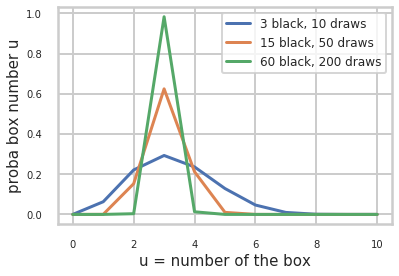

In [40]:
# Calcul de P(u|...)

#Nb de boules noires
NNoires = 3
#Nb de tirages
NTirages = 10

Pu = posterior(NNoires, NTirages)
Pu10 = posterior(NNoires*5, NTirages*5)
Pu100 = posterior(NNoires*20, NTirages*20)
    
plt.plot(Pu, label="3 black, 10 draws")
plt.plot(Pu10, label="15 black, 50 draws")
plt.plot(Pu100, label="60 black, 200 draws")
plt.xlabel('u = number of the box')
plt.ylabel('proba box number u')
plt.legend()
plt.show()

<b>
    <span style="color:purple">
        Remarques
    </span> 
</b>

Plus on tire des boules plus la distribution est piquée sur la bonne valeur de $u$.

Plus on observe de donnée, plus on on est confiant sur la valeur de $u$.

$$ p(T | Data) = \frac{p(Data | T) p(T)}{p(Data)} $$

$$ p(T | Data) = \frac{p(Data | T) p(T)}{\sum_T p(Data | T) p(T)} $$

<b>
    <span style="color:green">
        Sujet
    </span> 
</b>

### Utilisation de la distribution "à priori"

Implémenter à la main une distribution à priori $p(u)$.
Pour cela, prendre par exemple $u^* = 6$, on utilisera donc 


  * $p(u^*) = 0.3$
  * $p(u^* \pm 1) = 0.15$
  * $p(u) = 0.05$ sinon

Maintenant 

  1. tracer la fonction $p(u)$
  2. Modifier la fonction CaclPu pour tenir compte de cette distribution à priori.
  3. Tracer $p(u|n_N,N)$ avec $N$ prenant les valeurs $10$, $20$, $40$, $80$, $160$ et $N_{\rm noires} = 3,6,12,24,48$.

<b>
    <span style="color:orange">
        Question
    </span> 
</b>

Calculer et tracer la fonction $p(u)$

sum du prior : 0 = 1 ??


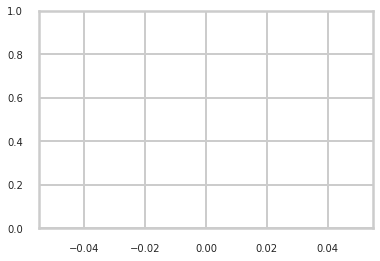

In [41]:
def prior_p(us=6):
    # TODO
    return 0

pr_u = prior_p()
print("sum du prior :", np.sum(pr_u) ,"= 1 ??")
plt.ylim(0,1)
plt.plot(pr_u)
plt.show()

<b>
    <span style="color:red">
        Correction
    </span> 
</b>

sum du prior : 1.0 = 1 ??


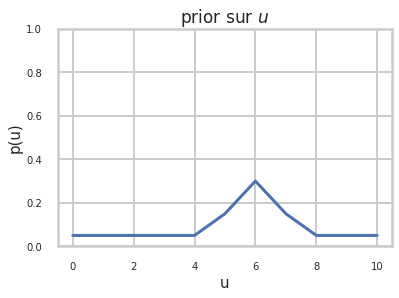

In [42]:
def prior_p(us=6):
    Prior_u = np.zeros(N_box)
    for u in range(N_box):
        Prior_u[u] = 0.05
    Prior_u[us] = 0.3
    Prior_u[us+1] = 0.15
    Prior_u[us-1] = 0.15
    return Prior_u

pr_u = prior_p()
print("sum du prior :", np.sum(pr_u) ,"= 1 ??")
plt.ylim(0,1)
plt.plot(pr_u)
plt.xlabel('u')
plt.ylabel('p(u)')
plt.title('prior sur $u$')
plt.show()

In [43]:
def evidence_prior(n_black, N_draw, prior_u):
    res = sum([likelihood(n_black, u, N_draw) * prior_u[u] for u in range(N_box)])
    return res

In [44]:
# version 0
def posterior_prior(n_black, N_draw, prior_u):
    Pu = np.zeros(N_box)
    for u in range(N_box):
        Pu[u] = likelihood(n_black, u, N_draw) * prior_u[u]/evidence_prior(n_black, N_draw, prior_u)
    return Pu

In [45]:
# Version 1
def posterior_prior(n_black, N_draw, prior_u):
    Pu = np.array([likelihood(n_black, u, N_draw) * prior_u[u] / evidence_prior(n_black, N_draw, prior_u) 
                   for u in range(N_box)])
    return Pu

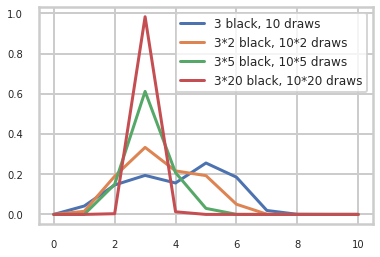

In [46]:
# Calcul de P(u|...)

#Nb de boules noires
NNoires = 3
#Nb de tirages
NTirages = 10

Pu = posterior_prior(NNoires, NTirages, pr_u)
Pu2 = posterior_prior(NNoires*2, NTirages*2, pr_u)
Pu10 = posterior_prior(NNoires*5, NTirages*5, pr_u)
Pu100 = posterior_prior(NNoires*20, NTirages*20, pr_u)
    
plt.plot(Pu, label='3 black, 10 draws')
plt.plot(Pu2, label='3*2 black, 10*2 draws')
plt.plot(Pu10, label='3*5 black, 10*5 draws')
plt.plot(Pu100, label='3*20 black, 10*20 draws')
plt.legend()
plt.show()

<b>
    <span style="color:purple">
        Remarques
    </span> 
</b>

Même avec un mauvais prior on converge quand même vers la bonne valeur !

C'est chouette quand même :D